### ST445 Managing and Visualizing Data
# Graphics and data vizualization in Python
### Week 7 lab, MT 2020

In [2]:
import numpy as np
import pandas as pd
import json
import datetime

## Import and clean the data

To illustrate the use of `matplotlib` and `seaborn` libraries, we use the GDP per capita data from `DBnomics` and wine chemistry composition data from `scikit-learn` in this notebook. 

In order to import the data, you may need to install the `DBnomics` and `scikit-learn` using the commands:
```{}
pip install dbnomics
```
and 
```{}
conda install -c anaconda scikit-learn
```

**If you just want to learn how to use `matplotlib` and `seaborn` libraries, you can just run the Python code below and take a look of the data. i.e. you don't have to read through how the data cleaning is done.**


### Cleaning GDP per capita data
We first collect the GDP per capita data from Eurostat via DBnomics and store them into a `DataFrame`:

In [3]:
from dbnomics import fetch_series

gdp = pd.DataFrame(columns = ['year', 'value', 'country'])
for code in ['UK', 'FR', 'IT', 'DE']:
    one_country_gdp = fetch_series('Eurostat/sdg_08_10/A.B1GQ.CLV10_EUR_HAB.'+code)[['original_period', 'value']]
    one_country_gdp.columns = ['year', 'value']
    one_country_gdp['country'] = code
    gdp = gdp.append(one_country_gdp)

display(gdp.head())

,year,value,country
0,2000,27130.0,UK
1,2001,27770.0,UK
2,2002,28250.0,UK
3,2003,29060.0,UK
4,2004,29560.0,UK


We then extract the time series we need for line plot:

In [4]:
gdp['year'] = pd.to_datetime(gdp['year']) # change the year from string to datetime
gdp_uk = gdp[gdp['country']=='UK']
gdp_fr = gdp[gdp['country']=='FR']
gdp_it = gdp[gdp['country']=='IT']
gdp_de = gdp[gdp['country']=='DE']

display(gdp_uk.head())

,year,value,country
0,2000-01-01,27130.0,UK
1,2001-01-01,27770.0,UK
2,2002-01-01,28250.0,UK
3,2003-01-01,29060.0,UK
4,2004-01-01,29560.0,UK


... and create another `DataFrame` `gdp_wide` to have each year data as an individual column:

In [5]:
gdp_wide = gdp.copy()
gdp_wide['year'] = gdp_wide['year'].apply(lambda x: x.year).values

gdp_wide = gdp_wide.pivot(index='country', columns='year', values='value')

display(gdp_wide)

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,
DE,28910.0,29370.0,29290.0,29100.0,29470.0,29730.0,30930.0,31920.0,32320.0,30580.0,31940.0,33200.0,33280.0,33330.0,33920.0,34130.0,34610.0,35380.0,35720.0,35840.0
FR,28930.0,29290.0,29410.0,29440.0,30050.0,30320.0,30850.0,31400.0,31310.0,30250.0,30690.0,31210.0,31160.0,31170.0,31320.0,31540.0,31770.0,32380.0,32860.0,33270.0
IT,27430.0,27950.0,27960.0,27850.0,28030.0,28090.0,28480.0,28730.0,28230.0,26590.0,26930.0,27020.0,26090.0,25480.0,25420.0,25640.0,26020.0,26490.0,26780.0,26920.0
UK,27130.0,27770.0,28250.0,29060.0,29560.0,30210.0,30810.0,31280.0,30940.0,29460.0,29830.0,29960.0,30190.0,30660.0,31290.0,31780.0,32060.0,32430.0,32640.0,32870.0


### Cleaning the wine data

We load the wind dataset from `sklearn` and store them into a `DataFrame` `wine`. `target` column stores the dependent variable, which is the type the wine. Independent variables are the chemical analysis information include `alcohol`, `ash`, etc. 

In [6]:
from sklearn.datasets import load_wine

wine_data = load_wine(as_frame = True)
wine = wine_data['data']
wine['target'] = wine_data['target'].apply(lambda i: wine_data['target_names'][i])

display(wine.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


# Matplotlib basics

## Import the libraries

We use both `matplotlib.pyplot` and `seaborn` in this notebook, although we mainly use `matplotlib.pyplot` here. `Matplotlib` is mainly for basic plotting and `seaborn` can produce some fancier plots, which we will give some examples at the end of the notebook. Even if you prefer using `seaborn`, you should know how to use `matplotlib.pyplot` as `seaborn` is built on top of `Matplotlib`.

In [7]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.reset_orig() # restore to the original settings

## Creating the plot

We create a empty figure with axes by

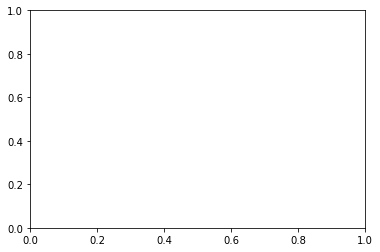

In [8]:
fig, ax = plt.subplots()
plt.show()

this return a `Figure` and an `Axes` object. `plt.show()` is used to make sure the plot is shown (although the plot may still be shown without calling `plt.show()`).

In this notebook we focus on manipulating the plots using `Axes` object `ax` or `plt` but not the `Figure` object `fig`. If you want to learn how you can `Figure` object to manipulate the plots, please see [here](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html).

After the empty plot is created, we can plot the data by using the `Axes` object `ax` and the method `plot()`. Here we use the time series data `gdp_uk` created above:

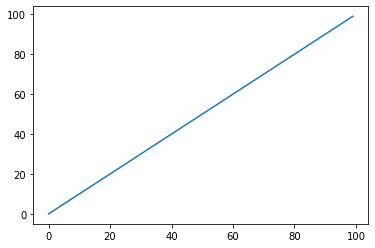

In [9]:
fig, ax = plt.subplots()
x = range(0, 100)
plt.plot(x)
plt.show()

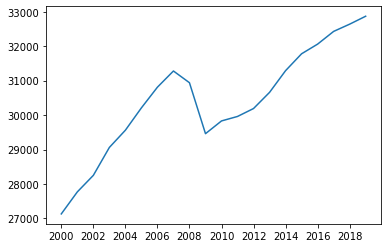

In [10]:
fig, ax = plt.subplots()

ax.plot(gdp_uk['year'], gdp_uk['value'])
plt.show()

If we want to have multiple plots in one figure, we can specify the number of rows/columns of the subplot grid in the `subplots()` method. It returns a figure and a _collection_ of axes objects. We can plot the data on each of the subplots via the axes, and here we use different GDP per capita time series to illustrate it:

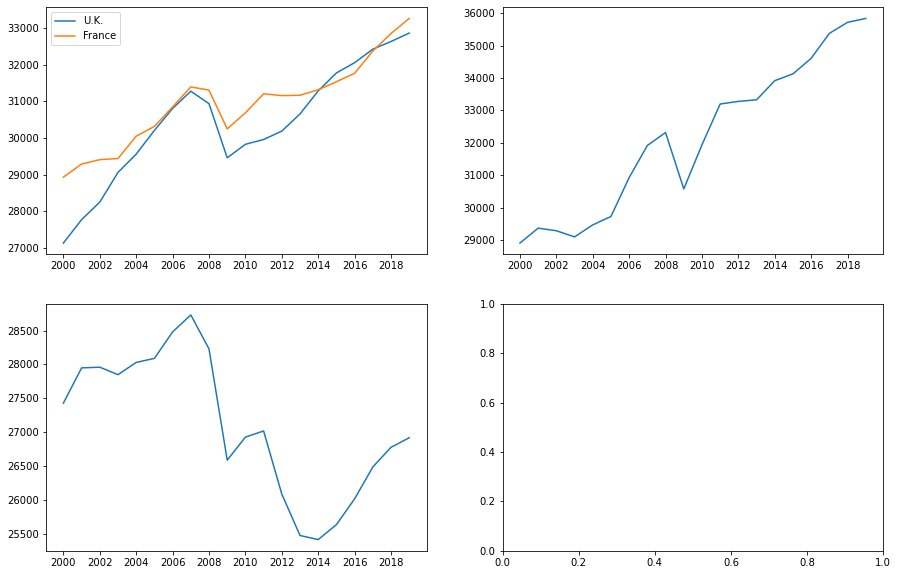

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (15,10)) # ax is an array of an array (2x2)

# ====== top left subplot =========
ax[0][0].plot(gdp_uk['year'], gdp_uk['value'], label = 'U.K.')
ax[0][0].plot(gdp_fr['year'], gdp_fr['value'], label = 'France')
ax[0][0].legend()

ax[0][1].plot(gdp_de['year'], gdp_de['value'], label = 'Germany') # top right
ax[1][0].plot(gdp_it['year'], gdp_it['value'], label = 'Italy') # bottom left

plt.show()

The argument `figsize` in `subplots()` determines the size of the figure. Note that if we call `plot()` via the same axes (here `ax[0][0]`) with different data, we plot different lines on the same subplot. `ax[0][0].legend()` create the legend for the lines for the top left subplot. We can add label, title, etc to the subplot by manipulating via `ax`:

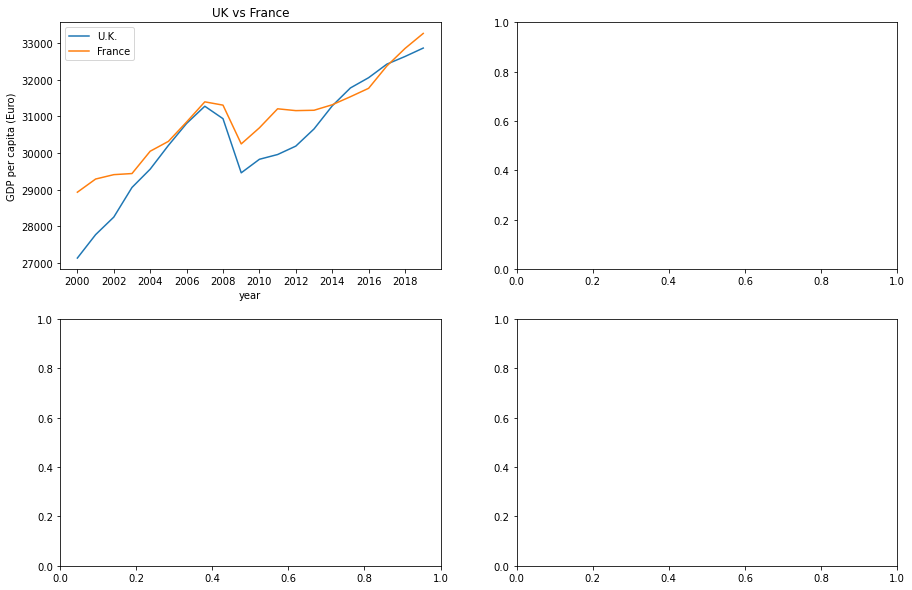

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (15,10))

ax[0][0].plot(gdp_uk['year'], gdp_uk['value'], label = 'U.K.')
ax[0][0].plot(gdp_fr['year'], gdp_fr['value'], label = 'France')
ax[0][0].legend()

ax[0][0].set_xlabel("year")
ax[0][0].set_ylabel("GDP per capita (Euro)")
ax[0][0].title.set_text('UK vs France')

plt.show()

If we only have one subplot, then we can work on either `plt` or `ax`. They will give you the same figure, although the syntax is different:

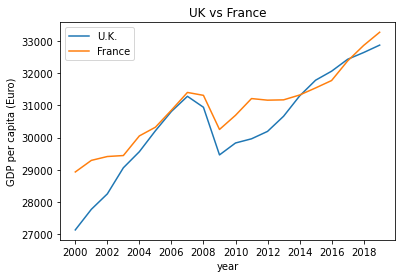

In [13]:
fig, ax = plt.subplots()

plt.plot(gdp_uk['year'], gdp_uk['value'], label = 'U.K.')
plt.plot(gdp_fr['year'], gdp_fr['value'], label = 'France')
plt.legend()

plt.xlabel('year')
plt.ylabel('GDP per capita (Euro)')
plt.title("UK vs France")

plt.show()

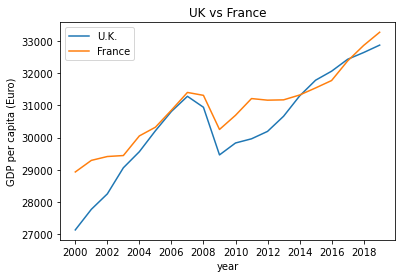

In [14]:
fig, ax = plt.subplots()

ax.plot(gdp_uk['year'], gdp_uk['value'], label = 'U.K.')
ax.plot(gdp_fr['year'], gdp_fr['value'], label = 'France')
ax.legend()

ax.set_xlabel('year') # note it was plt.xlabel('year') above
ax.set_ylabel('GDP per capita (Euro)')

ax.title.set_text("UK vs France") # note it was plt.title("UK vs France") above
plt.show()

Alternatively, you can plot by using the method `plot()` from `pandas` `Series` or `DataFrame`. Behind the scene, Pandas calls the plot functions from `Matplotlib`, so you can consider Pandas' `plot()` method is just a convenient shortcut to plot. As you can see below, plotting via `pandas` `plot()` method creates exactly the same plot as above when we use `Matplotlib` `plot()` method. Sometimes, though, it is more convenient to plot via `pandas`. See the side-by-side barplot below.

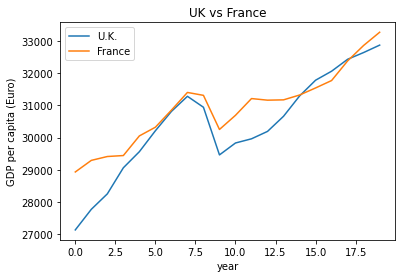

In [15]:
fig, ax = plt.subplots()

gdp_uk['value'].plot()
gdp_fr['value'].plot()
ax.legend(["U.K.", "France"])

ax.set_xlabel('year')
ax.set_ylabel('Euro')
ax.set_ylabel('GDP per capita (Euro)')

ax.title.set_text("UK vs France")

plt.show()

If you want to save the figure as a separate file, you can use the function `savefig()`:

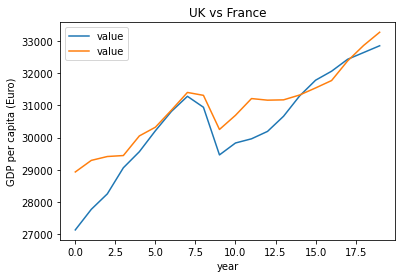

In [21]:
fig, ax = plt.subplots()

gdp_uk['value'].plot()
gdp_fr['value'].plot()
ax.legend()

ax.set_xlabel('year')
ax.set_ylabel('Euro')
ax.set_ylabel('GDP per capita (Euro)')

ax.title.set_text("UK vs France")

plt.savefig('gdp_uk_france.png') # you can find the file in the folder where you run this line of code

# Barplot

Here we show how use `matplotlib` to create barplots. First we have a look of the data:

In [22]:
display(gdp_wide[2019])

country
DE    35840.0
FR    33270.0
IT    26920.0
UK    32850.0
Name: 2019, dtype: float64

Now we plot the bars both vertically and horizontally using `ax`:

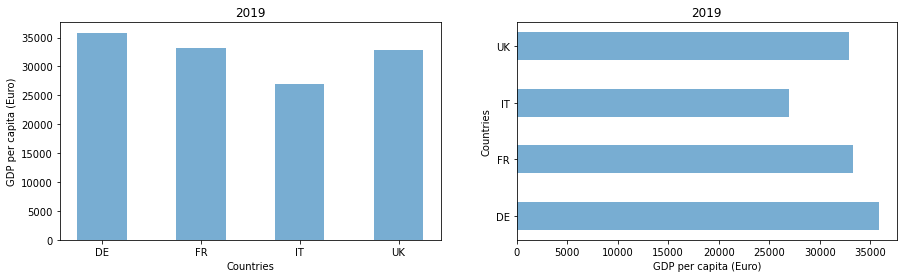

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ======== vertical bars ========
# ax = ax[0] indicates its the first subplot

ax[0].bar(gdp_wide[2019].index, gdp_wide[2019], alpha = 0.6, # the argument alpha = 0.6 makes the bars slightly transparent
          width = 0.5) # the argument width = 0.5 makes the bars thinner
ax[0].set_ylabel('GDP per capita (Euro)')
ax[0].set_xlabel('Countries')
ax[0].title.set_text("2019")


# ======== horizontal bars ========
# ax = ax[1] indicates its the second subplot
ax[1].barh(gdp_wide[2019].index, gdp_wide[2019], alpha = 0.6, 
           height = 0.5) # note here we use "height" to make the bars thinner
ax[1].set_xlabel('GDP per capita (Euro)')
ax[1].set_ylabel('Countries')
ax[1].title.set_text("2019")

plt.show()

Again, we can create similar figure by using `DataFrame` `plot()`. Note the `plot()` arguments are different.

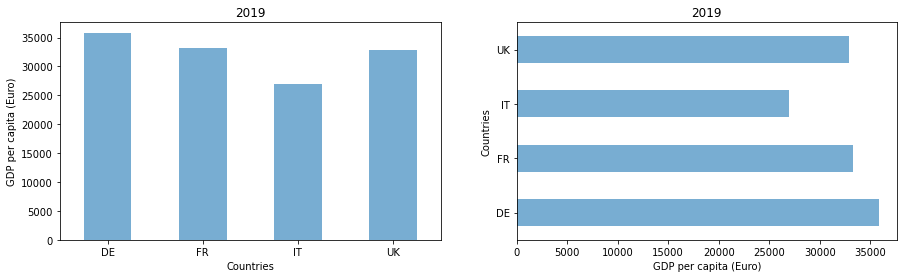

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ======== vertical bars ========
gdp_wide[2019].plot.bar(x = 'country', y = 'value', rot = 0, # rot = 0: what if you omit it?
                        ax = ax[0], # note we need to give ax as an argument
                        legend = False, alpha = 0.6) # legend = False: not to show legend
ax[0].set_ylabel('GDP per capita (Euro)')
ax[0].set_xlabel('Countries')
ax[0].title.set_text("2019")


# ======== horizontal bars ========
gdp_wide[2019].plot.barh(x='country', y='value',  ax = ax[1], legend = False, alpha = 0.6)
ax[1].set_xlabel('GDP per capita (Euro)')
ax[1].set_ylabel('Countries')
ax[1].title.set_text("2019")

plt.show()

We can have side-by-side bars by provide using `DataFrame` `plot()` function. You could use `Matplotlib` `plot()` but it is just easier with `DataFrame` `plot()`.

Again, let's first look at the data we are going to plot:

In [25]:
display(gdp_wide[[2009,2019]])

year,2009,2019
country,,
DE,30580.0,35840.0
FR,30250.0,33270.0
IT,26590.0,26920.0
UK,29460.0,32850.0


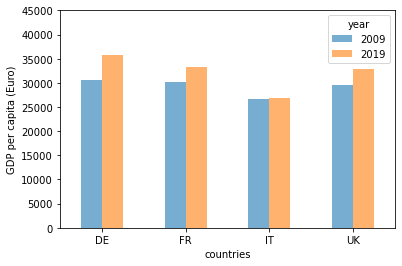

In [26]:
ax = gdp_wide[[2009,2019]].plot.bar(rot=0, alpha = 0.6) 

ax.set_ylim(top = 45000) # make ylim max to be larger so that the legend and the bars are not overlapping
ax.set_ylabel('GDP per capita (Euro)')
ax.set_xlabel('countries')

plt.show()

Note here we did not call `fig, ax = plt.subplots()` and then pass `ax` into `Dataframe` `plot()`. Instead we use the `ax` created from `Dataframe` `plot()`. We could of course use `fig, ax = plt.subplots()` and then pass `ax` into `Dataframe` `plot()` (as shown below), but we don't have to.

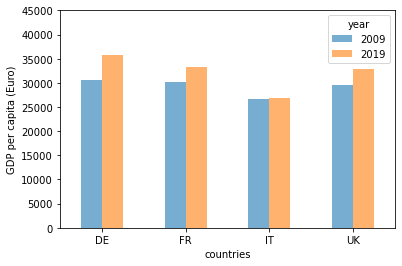

In [27]:
fig, ax = plt.subplots()

gdp_wide[[2009,2019]].plot.bar(rot=0, alpha = 0.6, ax = ax) 

ax.set_ylim(top = 45000) # make ylim max to be larger so that the legend and the bars are not overlapping
ax.set_ylabel('GDP per capita (Euro)')
ax.set_xlabel('countries')

plt.show()

# Histogram: showing the distribution of a variable

Below we use create histogram via `plt`, but of course you can use `ax` instead if you want to (although the syntax for setting labels and title is not the same).

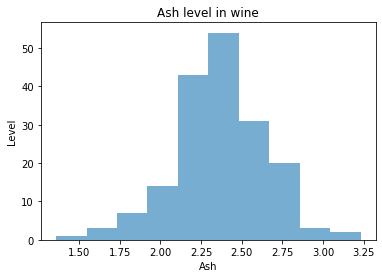

In [28]:
fig, ax = plt.subplots()

plt.hist(wine['ash'], 10, alpha = 0.6)
plt.xlabel('Ash')
plt.ylabel('Level')
plt.title("Ash level in wine")

plt.show()

If you want to have histogram to represent relative frequency, you can use the argument `density = 1`:

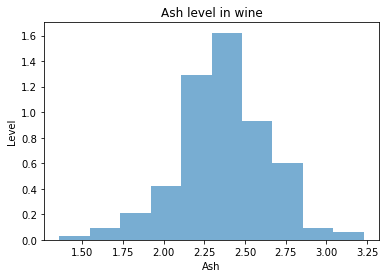

In [29]:
fig, ax = plt.subplots()

plt.hist(wine['ash'], 10, density = 1, alpha = 0.6)
plt.xlabel('Ash')
plt.ylabel('Level')
plt.title("Ash level in wine")

plt.show()

# Boxplot and variation: showing the distribution of a variable

In Python we can create boxplot and its variations using either `matplotlib` and `seaborn`. We will use the wine dataset for the illustrate from this section onwards.

Let us first illustrate how to do it via `matplotlib`. Again, let's have a look of the data:

In [30]:
display(wine['color_intensity'].describe())

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64

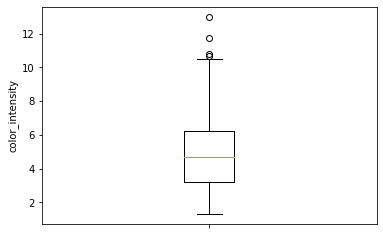

In [31]:
fig, ax = plt.subplots()

ax.boxplot(wine['color_intensity'])
ax.set_ylabel('color_intensity')
ax.set_xticklabels([''])

plt.show()

Often, it is more useful to have boxplots side by side to compare the same variables conditional on some factors. For example, here we want to see the color intensity of wines given the type of the wine. With `matplotlib`, we need to first convert our long `wine['color_intensity']` data to wide:

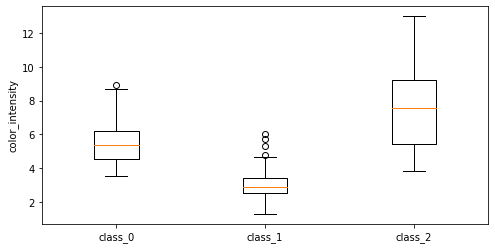

In [32]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.boxplot([wine['color_intensity'][wine['target']=='class_0'],
            wine['color_intensity'][wine['target']=='class_1'],
            wine['color_intensity'][wine['target']=='class_2']])

ax.set_ylabel('color_intensity')
ax.set_xticklabels(wine_data['target_names'])

plt.show()

For this case, it may be easier to use `seaborn`, as we can just use the original `wine` `DataFrame`. Again, let's look at the data, and remember `target` is the label of the class:

In [33]:
display(wine.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


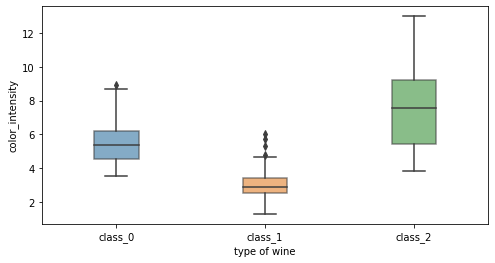

In [34]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = wine, x = 'target', y = 'color_intensity', width = 0.3, 
            boxprops = dict(alpha=0.6)) # note in seaborn alpha (and other parameters) is set in a different way

ax.set_xlabel("type of wine")

plt.show()

If we want to create a notched boxplot, we just need to add the argument `notch = True`:

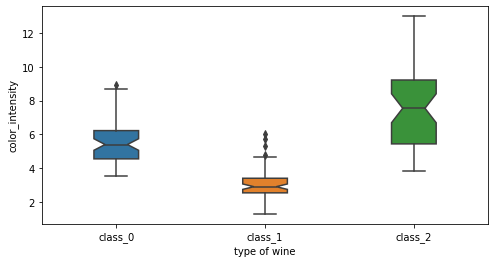

In [35]:
plt.subplots(figsize=(8, 4))

ax = sns.boxplot(data = wine, x = 'target', y = 'color_intensity', notch = True, width = 0.3)

ax.set_xlabel("type of wine")

plt.show()

If we want to create a violin plot, we use the `violinplot()`. Below boxplot is plotted as well, just to show you how you can have subplots with `seaborn`:

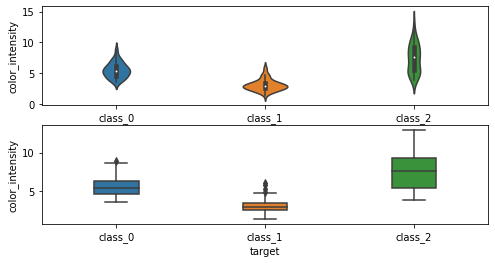

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

sns.violinplot(data = wine, x = 'target', y = 'color_intensity', ax = ax[0], width = 0.3)
sns.boxplot(data = wine, x = 'target', y = 'color_intensity', ax = ax[1], width = 0.3)

ax[0].set_xlabel("type of wine")

plt.show()

# Scatter: showing relations between two variables

Below we use create scatter plot via `DataFrame` `plot()`, but of course you can use `matplotlib` instead if you want to.

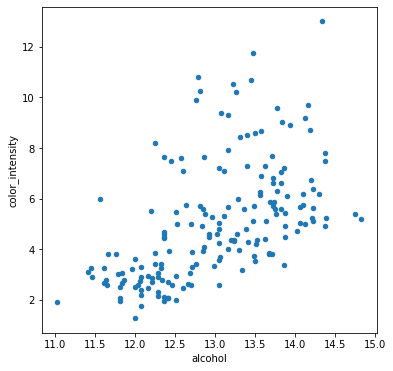

In [37]:
ax = wine.plot.scatter('alcohol', 'color_intensity', figsize=(6, 6)) # use a square plot size

plt.show()

With `seaborn`, you can do some fancier scatter plots with marginal distribution, and with different categories:

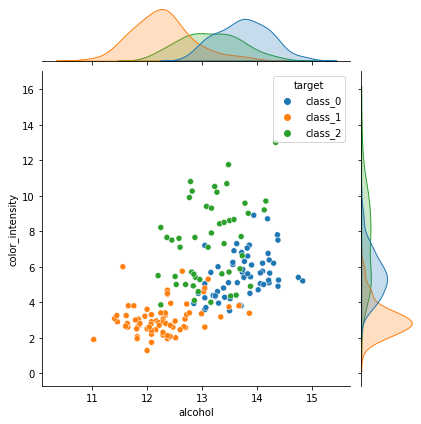

In [43]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine, hue = "target")

plt.show()

... or with the bivariate and univariate Kernel density estimation:

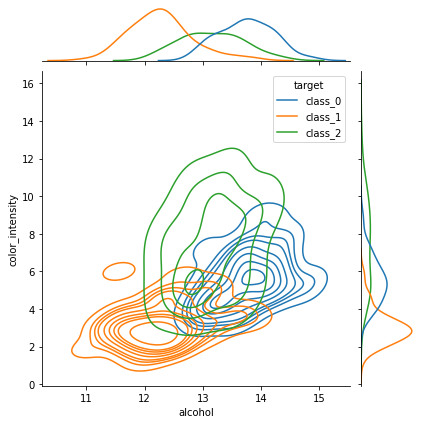

In [44]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine, kind = 'kde', hue = "target")

plt.show()

Note that for the `joinplot()` it is not easy to plot multiple subplots like the other plots above... See Stack Overflow [answer](https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot) if you want to know how it can be done, or [here](https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface) for explanation.

If you want to create even fancier plots, see [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html).